In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [56]:
from fingerprinting_skeleton import *

In [80]:
%pwd

'/Users/andreas/PycharmProjects/aims_lab/set1/testWifiData'

In [82]:
%cd ..

/Users/andreas/PycharmProjects/aims_lab


In [83]:
# Number of measurements per location
nSamples = 60

# ---- Configure Parameters -----
# Select Dataset (set1 or set2)
# parser = argparse.ArgumentParser()
# parser.add_argument('-s','--data_set', choices={"set1", "set2"}, type=str,
#     default='set1')
# args = parser.parse_args()
data_set = 'set2'

# Visualize the RSS in location = loc
loc = 2

# ----- Run System ------

# set1 contains 3 access points and set2 5 access points
if data_set == "set1":
    nAP = 3
else:
    nAP = 5

init()

# Load the RSS measurements from file
(trainDB, testDB) = load_wifi_data(data_set, nSamples, nAP)


************************************************************
 The Horus Localization System
 Sensor Networks Course - University of Oxford
************************************************************


-> Loading files...done


-> Displaying fingerprints...

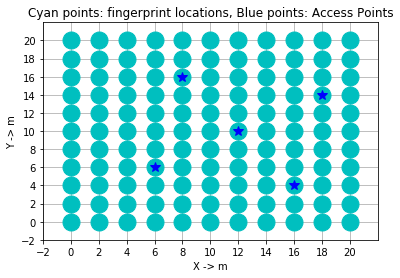

done


In [84]:
 # Show fingerprint locations
show_fingerprints(trainDB, nAP)

-> Visualizing histograms...

/Users/andreas/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


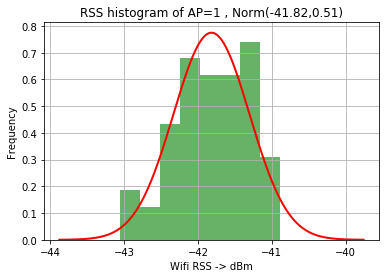

/Users/andreas/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


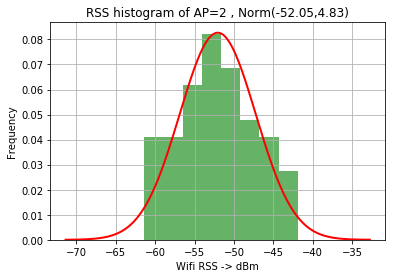

/Users/andreas/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


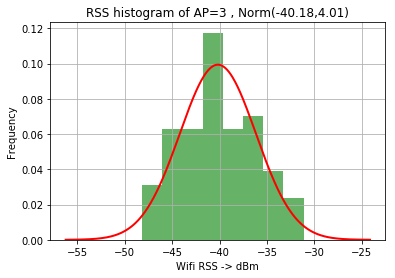

/Users/andreas/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


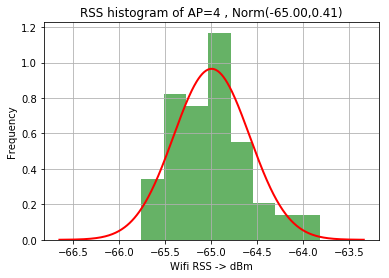

/Users/andreas/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


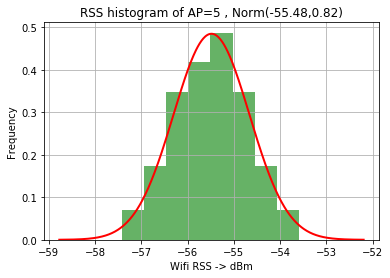

done


In [85]:
# Plot the RSS histogram and approximate it with a Gaussian
plot_histogram(trainDB, loc, nAP, nSamples)

In [86]:
# Fit Gaussian distribution to the RSS measurements
wifiDB = fit_data(trainDB, nSamples, nAP)

-> Modeling RSS with Gaussian dist...done


In [87]:
wifiDB.shape

(121, 13)

In [88]:
wifiDB[0]

array([  0.        ,   0.        ,   0.        , -44.38766667,
         0.40537788, -62.14      ,   5.66951967, -44.05283333,
         4.94216926, -66.45866667,   0.32798611, -60.9465    ,
         0.85094227])

In [89]:
testDB.shape

(63, 253)

In [90]:
len(testDB)

63

In [91]:
testDB[0]

array([  0.  ,   3.  ,   3.  , -38.22, -38.32, -37.91, -38.37, -38.52,
       -37.29, -38.09, -37.26, -38.42, -37.98, -38.02, -37.85, -37.8 ,
       -38.3 , -38.61, -38.38, -38.32, -37.87, -37.74, -38.68, -37.96,
       -38.67, -37.56, -37.19, -38.61, -38.25, -38.13, -37.99, -38.47,
       -38.14, -37.87, -38.94, -38.18, -38.06, -38.17, -37.25, -38.74,
       -38.76, -36.99, -39.07, -39.41, -38.08, -37.88, -38.38, -38.15,
       -38.18, -39.03, -38.89, -38.63, -37.98, -58.25, -64.49, -64.86,
       -57.75, -61.49, -53.01, -53.9 , -55.97, -64.94, -59.79, -51.25,
       -63.23, -58.01, -55.67, -55.96, -68.28, -62.47, -62.57, -58.71,
       -57.44, -53.94, -58.05, -66.17, -64.73, -56.98, -53.82, -57.06,
       -65.48, -63.87, -51.21, -62.33, -70.01, -59.89, -56.18, -57.25,
       -69.93, -64.36, -70.17, -66.98, -62.95, -59.97, -52.5 , -60.26,
       -51.71, -55.52, -57.24, -64.26, -58.12, -59.93, -67.05, -42.22,
       -35.91, -41.06, -48.25, -40.96, -49.49, -46.36, -45.61, -44.54,
      

In [97]:
# Run the localization algorithm
# Estimate the unknown location given RSS measurements at that location
(actualLoc, predictedLoc) = predict(wifiDB, testDB, nAP, nSamples)

-> Running Horus...done


In [100]:
# Run the localization algorithm
# Estimate the unknown location given RSS measurements at that location
(actualLoc2, predictedLoc2) = predict2(wifiDB, testDB, nAP)

-> Running Horus...-> Modeling RSS with Gaussian dist...done
done


-> Visualizing estimated trajectory...

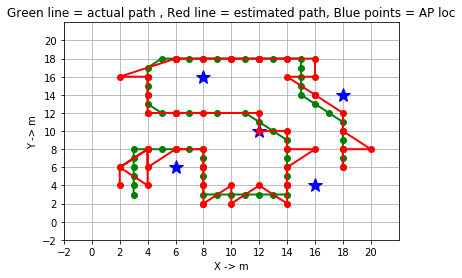

done
-> Visualizing estimated trajectory...

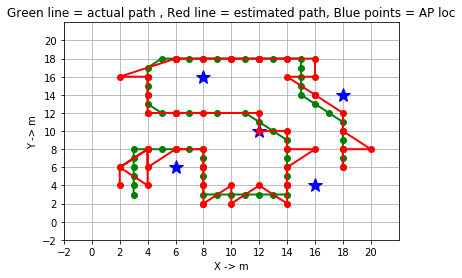

done


In [99]:
plot_path(actualLoc, predictedLoc, nAP)
plot_path(actualLoc2, predictedLoc2, nAP)

-> Calculating localization error...

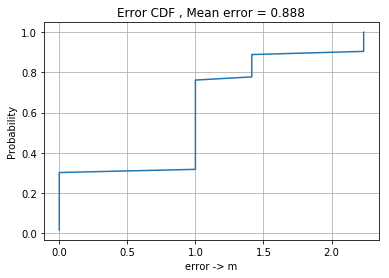

done
-> Calculating localization error...

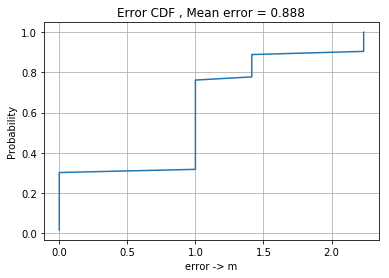

done


In [96]:
plot_error(actualLoc, predictedLoc)
plot_error(actualLoc2, predictedLoc2)